In [9]:
import casadi as cs
import numpy as np
import matplotlib.pyplot as plt

In [178]:
opti = cs.Opti()

T = opti.variable()
a0 = opti.variable()
a1 = opti.variable()
a2 = opti.variable()
a3 = opti.variable()
a4 = opti.variable()
a5 = opti.variable()

In [ ]:
def max_df(T):
    # gets maximum value of df by sampling at 5 intervals 
    x0 = cs.fabs(a1 + (2*a2*(0*T/4)) + (3*a3*(0*T/4)**2) + (4*a4*(0*T/4)**3) + (5*a5*(0*T/4)**4))
    x1 = cs.fabs(a1 + (2*a2*(1*T/4)) + (3*a3*(1*T/4)**2) + (4*a4*(1*T/4)**3) + (5*a5*(1*T/4)**4))
    x2 = cs.fabs(a1 + (2*a2*(2*T/4)) + (3*a3*(2*T/4)**2) + (4*a4*(2*T/4)**3) + (5*a5*(2*T/4)**4))
    x3 = cs.fabs(a1 + (2*a2*(3*T/4)) + (3*a3*(3*T/4)**2) + (4*a4*(3*T/4)**3) + (5*a5*(3*T/4)**4))
    x4 = cs.fabs(a1 + (2*a2*(4*T/4)) + (3*a3*(3*T/4)**2) + (4*a4*(3*T/4)**3) + (5*a5*(3*T/4)**4))
    return cs.fmax(cs.fmax(cs.fmax(x0, x1), cs.fmax(x2, x3)), x4)

def f(t):   return   a0 +   (a1*t) +    (a2*t**2) +    (a3*t**3) +   (a4*t**4) + (a5*t**5)
def df(t):  return   a1 + (2*a2*t) +  (3*a3*t**2) +  (4*a4*t**3) + (5*a5*t**4)
def ddf(t): return 2*a2 + (6*a3*t) + (12*a4*t**2) + (20*a5*t**3)

opti.minimize( T )

opti.subject_to( T > 0.1 )
opti.subject_to( f(0) == 2 )
opti.subject_to( df(0) == 0 )
opti.subject_to( ddf(0) == 0 )
opti.subject_to( f(T) == 10 )
opti.subject_to( df(T) == 0 )
opti.subject_to( ddf(T) == 0 )

opti.subject_to( max_df(T) <= 5)    # Adding constraint on maximum achievable velocity

opti.solver('ipopt')
sol = opti.solve()

In [180]:
# found coefficients
print(f'Coefficients \n a0 = {sol.value(a0)},\n a1 = {sol.value(a1)},\n a2 = {sol.value(a2)},\n a3 = {sol.value(a3)},\n a4 = {sol.value(a4)},\n a5 = {sol.value(a5)}')

Coefficients 
 a0 = 2.0,
 a1 = 6.199087008496415e-34,
 a2 = 0.0,
 a3 = 2.9629630444202992,
 a4 = -1.4814815357852225,
 a5 = 0.1975308732479608


In [181]:
# using these coefficients to plot the graph
a0 = sol.value(a0)
a1 = sol.value(a1)
a2 = sol.value(a2)
a3 = sol.value(a3)
a4 = sol.value(a4)
a5 = sol.value(a5)
T = sol.value(T)

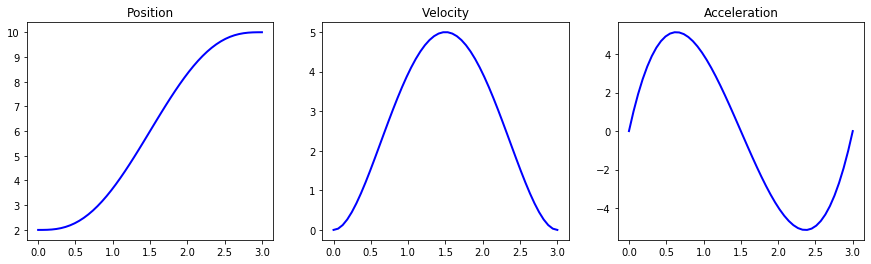

In [183]:
t = np.linspace(0, T, 50)
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].set(title="Position")
axs[0].plot(t, f(t), 'b', lw=2)

axs[1].set(title="Velocity")
axs[1].plot(t, df(t), 'b', lw=2)

axs[2].set(title="Acceleration")
axs[2].plot(t, ddf(t), 'b', lw=2)
plt.show()